In [1]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [2]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [3]:
simulator = Aer.get_backend('aer_simulator')

# Simulating a quantum circuit

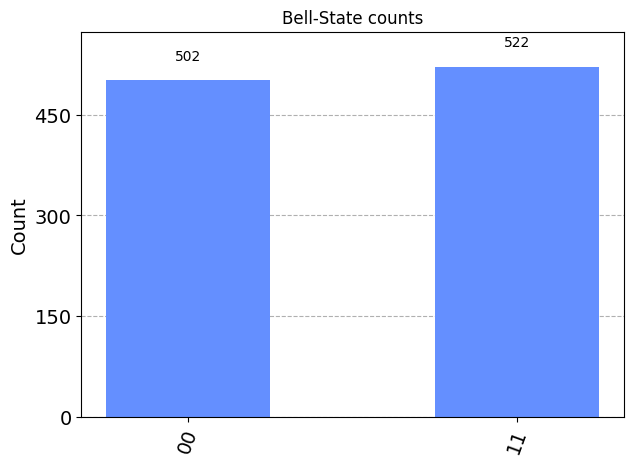

In [5]:
# create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('qasm_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

# Transpiler: 
Transpilers also convert an input source code written in some language into an output code in a different language, that has a similar 
level of abstraction as compared to the source code. 
Transpilers are source-to-source converters. 
They convert codes from one high-level language, say Java, to another high-level language with a similar level of abstraction, say C++. 
This output is still abstract to the hardware and needs a compiler to convert into assembly language to run on the machine.

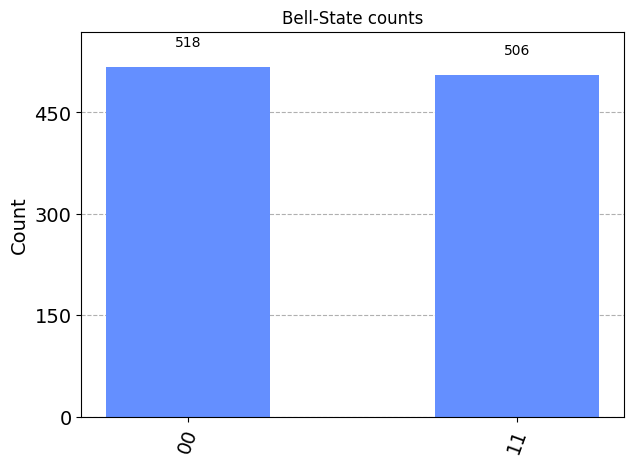

In [6]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

The QasmSimulator also supports returning a list of measurement outcomes for each individual shot. 
This is enabled by setting the keyword argument memory=True in the run.

In [8]:
# Run and get memory
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['00', '00', '00', '00', '11', '11', '00', '11', '00', '00']


# Aer Simulator Options¶
The AerSimulator backend supports a variety of configurable options which can be updated using the set_options method. 
See the AerSimulator API documentation for additional details.

## Simulation Method¶

The AerSimulator supports a variety of simulation methods, each of which supports a different set of instructions. 
The method can be set manually using simulator.
set_option(method=value) option, or a simulator backend with a preconfigured method can be obtained directly from the Aer provider using 
Aer.get_backend.

When simulating ideal circuits, changing the method between the exact simulation methods stabilizer, statevector, density_matrix and matrix_product_state
should not change the simulation result (other than usual variations from sampling probabilities for measurement outcomes)

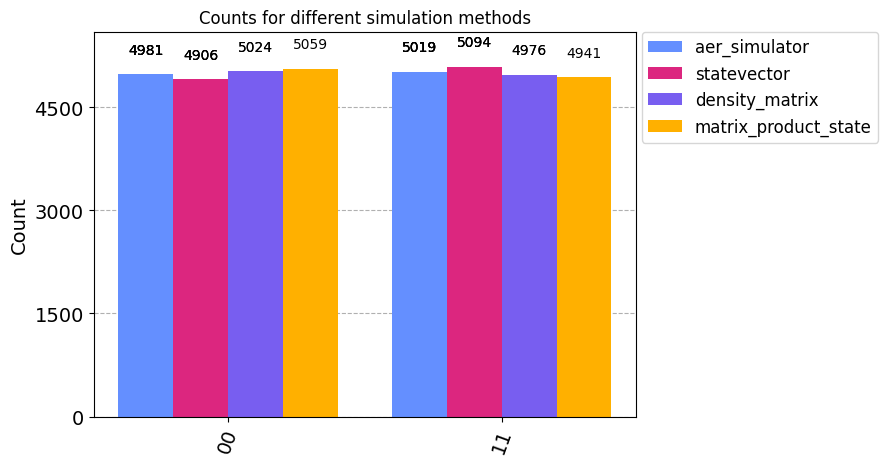

In [14]:
# Increase shots to reduce sampling variance
shots = 10000

# Stabilizer simulation method
sim_stabilizer = Aer.get_backend('aer_simulator')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

# Statevector simulation method
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Density Matrix simulation method
sim_density = Aer.get_backend('aer_simulator_density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = Aer.get_backend('aer_simulator_matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)

plot_histogram([counts_stabilizer, counts_statevector, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=['aer_simulator', 'statevector',
                       'density_matrix', 'matrix_product_state'])

## Automatic Simulation Method¶
The default simulation method is automatic which will automatically select a one of the other simulation methods for each circuit based on the 
instructions in those circuits. 
A fixed simulation method can be specified by by adding the method name when getting the backend, or by setting the method option on the backend.

# GPU Simulation¶
The statevector, density_matrix and unitary simulators support running on a NVidia GPUs. 
For these methods the simulation device can also be manually set to CPU or GPU using simulator.set_options(device='GPU') backend option. 
If a GPU device is not available setting this option will raise an exception.
"Invalid simulation device GPU. Available devices are: ['CPU']"

In [15]:
from qiskit.providers.aer import AerError

# Initialize a GPU backend
# Note that the cloud instance for tutorials does not have a GPU
# so this will raise an exception.
try:
    simulator_gpu = Aer.get_backend('aer_simulator')
    simulator_gpu.set_options(device='GPU')
except AerError as e:
    print(e)

The Aer provider will also contain preconfigured GPU simulator backends if Qiskit Aer was installed with GPU support on a compatible system:

aer_simulator_statevector_gpu

aer_simulator_density_matrix_gpu

aer_simulator_unitary_gpu

Note: The GPU version of Aer can be installed using ``pip install qiskit-aer-gpu``.

# Simulation Precision¶
One of the available simulator options allows setting the float precision for the statevector, density_matrix unitary and superop methods. 
This is done using the set_precision="single" or precision="double" (default) option:

In [16]:
# Configure a single-precision statevector simulator backend
simulator = Aer.get_backend('aer_simulator_statevector')
simulator.set_options(precision='single')

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)

{'00': 503, '11': 521}


Setting the simulation precision applies to both CPU and GPU simulation devices. 
Single precision will halve the required memory and may provide performance improvements on certain systems.

In [17]:
# Configure a single-precision statevector simulator backend
simulator = Aer.get_backend('aer_simulator_statevector')
simulator.set_options(precision='double')

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)

{'11': 527, '00': 497}
